In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Sat Jan 27 04:13:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install esda
!pip install geopandas
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.9 MB/s eta 0:00:00


In [4]:
import esda
import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify as mc
import libpysal as lps
from geopandas import GeoDataFrame
from matplotlib import colors
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sbn
from pyproj import CRS
from tqdm import tqdm
import torch
import os
import random
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler, StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torch.utils.data as Data
from torchvision import transforms, datasets
from sklearn.metrics import r2_score, accuracy_score

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 读取数据

In [6]:
#  三种情景，三组数据
data1 = pd.read_excel("drive/MyDrive/Colab Notebooks/data/基准处理后1.xlsx")
data2 = pd.read_excel("drive/MyDrive/Colab Notebooks/data/产业结构处理后1.xlsx")
data3 = pd.read_excel("drive/MyDrive/Colab Notebooks/data/粗放处理后1.xlsx")
data4 = pd.read_excel("drive/MyDrive/Colab Notebooks/data/节能减排处理后1.xlsx")
data5 = pd.read_excel("drive/MyDrive/Colab Notebooks/data/协调发展处理后1.xlsx")

In [7]:
df_1 = data1.rename(
    columns={
        'ce':'y',
        'peo':'x1',
        'mon':'x2',
        'nq':'x3',
        'tbz':'x4',
        'cj':'x5',
        'cz':'x6',
        'FDI':'x7',
        'gj':'x8',
        'did':'x9',
        'peo_lag':'X1',
        'mon_lag':'X2',
        'nq_lag':'X3',
        'tbz_lag':'X4',
        'cj_lag':'X5',
        'cz_lag':'X6',
        'FDI_lag':'X7',
        'gj_lag':'X8',
        'did_lag':'X9',
        'city':'city'
    }
)

df_2 = data2.rename(
    columns={
        'ci':'y',
        'peo':'x1',
        'mon':'x2',
        'nq':'x3',
        'tbz':'x4',
        'cj':'x5',
        'cz':'x6',
        'FDI':'x7',
        'gj':'x8',
        'did':'x9',
        'peo_lag':'X1',
        'mon_lag':'X2',
        'nq_lag':'X3',
        'tbz_lag':'X4',
        'cj_lag':'X5',
        'cz_lag':'X6',
        'FDI_lag':'X7',
        'gj_lag':'X8',
        'did_lag':'X9',
        'city':'city'
    }
)

df_3 = data3.rename(
    columns={
        'ci':'y',
        'peo':'x1',
        'mon':'x2',
        'nq':'x3',
        'tbz':'x4',
        'cj':'x5',
        'cz':'x6',
        'FDI':'x7',
        'gj':'x8',
        'did':'x9',
        'peo_lag':'X1',
        'mon_lag':'X2',
        'nq_lag':'X3',
        'tbz_lag':'X4',
        'cj_lag':'X5',
        'cz_lag':'X6',
        'FDI_lag':'X7',
        'gj_lag':'X8',
        'did_lag':'X9',
        'city':'city'
    }
)

df_4 = data4.rename(
    columns={
        'ci':'y',
        'peo':'x1',
        'mon':'x2',
        'nq':'x3',
        'tbz':'x4',
        'cj':'x5',
        'cz':'x6',
        'FDI':'x7',
        'gj':'x8',
        'did':'x9',
        'peo_lag':'X1',
        'mon_lag':'X2',
        'nq_lag':'X3',
        'tbz_lag':'X4',
        'cj_lag':'X5',
        'cz_lag':'X6',
        'FDI_lag':'X7',
        'gj_lag':'X8',
        'did_lag':'X9',
        'city':'city'
    }
)

df_5 = data5.rename(
    columns={
        'ci':'y',
        'peo':'x1',
        'mon':'x2',
        'nq':'x3',
        'tbz':'x4',
        'cj':'x5',
        'cz':'x6',
        'FDI':'x7',
        'gj':'x8',
        'did':'x9',
        'peo_lag':'X1',
        'mon_lag':'X2',
        'nq_lag':'X3',
        'tbz_lag':'X4',
        'cj_lag':'X5',
        'cz_lag':'X6',
        'FDI_lag':'X7',
        'gj_lag':'X8',
        'did_lag':'X9',
        'city':'city'
    }
)

In [8]:
#  分别提取X和Y
x1 = pd.DataFrame(df_1, columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", 'city'])
y1 = pd.DataFrame(df_1, columns=["y"])
x2 = pd.DataFrame(df_2, columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", 'city'])
y2 = pd.DataFrame(df_2, columns=["y"])
x3 = pd.DataFrame(df_3, columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", 'city'])
y3 = pd.DataFrame(df_3, columns=["y"])
x4 = pd.DataFrame(df_4, columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", 'city'])
y4 = pd.DataFrame(df_4, columns=["y"])
x5 = pd.DataFrame(df_5, columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", 'city'])
y5 = pd.DataFrame(df_5, columns=["y"])
#x1 = np.array(x1)
#y1 = np.array(y1)
x1.shape

(1170, 19)

# 加入高斯噪声

In [9]:
def gauss_noisy(x, y):
    """
    对输入数据加入高斯噪声
    :param x: x轴数据
    :param y: y轴数据
    :return:
    """
    mu = 0
    sigma = 0.05
    for i in range(len(x)):
        x[i] += random.gauss(mu, sigma)
        #y[i] += random.gauss(mu, sigma)

In [10]:
y1 = y1.apply(np.exp)
#x1 = x1.apply(np.exp)

In [11]:
#  三组数据分别加入高斯噪声
#gauss_noisy(x1, y1)
x1 = pd.DataFrame(x1)
y1 = pd.DataFrame(y1)

In [12]:
data1 = pd.concat([y1,x1], axis=1)
data1 = np.array(data1)
data2 = pd.concat([y2,x2], axis=1)
data2 = np.array(data2)
data3 = pd.concat([y3,x3], axis=1)
data3 = np.array(data3)
data4 = pd.concat([y4,x4], axis=1)
data4 = np.array(data4)
data5 = pd.concat([y5,x5], axis=1)
data5 = np.array(data5)

# 分割数据

In [ ]:
data1.shape

(1170, 20)

In [13]:
X1 = data1[:750, 1:]
X1 = X1.reshape(750, 1, 19)
Y1 = data1[:750, 0]
Y1 = Y1.reshape(750, 1)
X1_pre = data1[750:, 1:]
X1_pre = X1_pre.reshape(420, 1, 19)

X2 = data2[:750, 1:]
X2 = X2.reshape(750, 1, 19)
Y2 = data2[:750, 0]
Y2 = Y2.reshape(750, 1)
X2_pre = data2[750:, 1:]
X2_pre = X2_pre.reshape(420, 1, 19)

X3 = data3[:750, 1:]
X3 = X3.reshape(750, 1, 19)
Y3 = data3[:750, 0]
Y3 = Y3.reshape(750, 1)
X3_pre = data3[750:, 1:]
X3_pre = X3_pre.reshape(420, 1, 19)

X4 = data4[:750, 1:]
X4 = X4.reshape(750, 1, 19)
Y4 = data4[:750, 0]
Y4 = Y4.reshape(750, 1)
X4_pre = data4[750:, 1:]
X4_pre = X4_pre.reshape(420, 1, 19)

X5 = data5[:750, 1:]
X5 = X5.reshape(750, 1, 19)
Y5 = data5[:750, 0]
Y5 = Y5.reshape(750, 1)
X5_pre = data5[750:, 1:]
X5_pre = X5_pre.reshape(420, 1, 19)

In [14]:
print(X1.shape, Y1.shape, X1_pre.shape)

(750, 1, 19) (750, 1) (420, 1, 19)


In [15]:
train_x1 = X1[:540, :, :]
train_y1 = Y1[:540, :]
test_x1 = X1[540:, :, :]
test_y1 = Y1[540:, :]

In [ ]:
train_x1.shape

(540, 1, 19)

In [ ]:
train_y1.shape

(540, 1)

In [ ]:
test_x1.shape

(210, 1, 19)

In [ ]:
test_y1.shape

(210, 1)

# 转张量

In [16]:
train_x1 = torch.from_numpy(train_x1.astype(np.float32))
train_y1 = torch.from_numpy(train_y1.astype(np.float32))
test_x1 = torch.from_numpy(test_x1.astype(np.float32))
test_y1 = torch.from_numpy(test_y1.astype(np.float32))

pre_x1 = torch.from_numpy(X1_pre.astype(np.float32))
pre_x2 = torch.from_numpy(X2_pre.astype(np.float32))
pre_x3 = torch.from_numpy(X3_pre.astype(np.float32))
pre_x4 = torch.from_numpy(X4_pre.astype(np.float32))
pre_x5 = torch.from_numpy(X5_pre.astype(np.float32))

In [ ]:
train_x1.shape

torch.Size([540, 1, 19])

In [ ]:
type(train_x1)

torch.Tensor

In [17]:
train_x1, train_y1 = train_x1.to(device), train_y1.to(device)
test_x1, test_y1 = test_x1.to(device), test_y1.to(device)
pre_x1, pre_x2, pre_x3, pre_x4, pre_x5 = pre_x1.to(device), pre_x2.to(device), pre_x3.to(device), pre_x4.to(device), pre_x5.to(device)

In [18]:
# 数据装入
def data_generator(x_train,y_train,x_test,y_test,n_iters,batch_size):

    num_epochs=n_iters/(len(x_train)/batch_size) # n_iters代表一次迭代
    num_epochs=int(num_epochs)
    train_dataset=Data.TensorDataset(x_train,y_train)
    test_dataset=Data.TensorDataset(x_train,y_train)
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False,drop_last=True) # 加载数据集,使数据集可迭代
    test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False,drop_last=True)

    return train_loader,test_loader,num_epochs

# 神经网络搭建

## Lstm-Cnn

In [91]:
# 定义模型
from turtle import forward
import torch.nn as nn
import torch.nn.functional as F

# 定义一个类
class LstmCnn(nn.Module):
    def __init__(self,in_channels,hidden_size,num_layers,output_size,batch_size,kernel_size) -> None:
        super(LstmCnn,self).__init__()
        self.in_channels=in_channels
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.output_size=output_size
        self.batch_size=batch_size
        self.kernel_size=kernel_size
        self.num_directions=1 # 单向LSTM
        self.relu = nn.ReLU(inplace=True)
        self.lstm=nn.LSTM(input_size=self.in_channels,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.conv1=nn.Sequential(
            #nn.Dropout(0.1),
            nn.Conv1d(in_channels=1, out_channels=4, kernel_size=1), #shape(64,3,32)  ->(64,64,30)
            #nn.BatchNorm1d(num_features=16),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=16),
            nn.AvgPool1d(kernel_size=self.kernel_size)
        )
        self.conv2=nn.Sequential(
            #nn.Dropout(0.1),
            nn.Conv1d(in_channels=4, out_channels=16, kernel_size=1), #shape(64,64,30)  ->(64,64,28)
            #nn.BatchNorm1d(num_features=64),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=64),
            nn.AvgPool1d(kernel_size=self.kernel_size))#shape(16,64,28)  ->(16,64,14)

        self.conv3=nn.Sequential(
            #nn.Dropout(0.1),
            nn.Conv1d(in_channels=16, out_channels=64, kernel_size=1), #shape(64,64,14)  ->(64,128,12)
            #nn.BatchNorm1d(num_features=128),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=128),
            nn.AvgPool1d(kernel_size=self.kernel_size)
        )
        self.conv4=nn.Sequential(
            #nn.Dropout(0.1),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1), #shape(64,128,12)  ->(64,128,10)
            #nn.BatchNorm1d(num_features=256),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=256),
            nn.AvgPool1d(kernel_size=self.kernel_size) #shape(16,128,10)  ->(16,128,5)
        )
        self.conv5=nn.Sequential(
            #nn.Dropout(0.1),
            nn.Conv1d(in_channels=128, out_channels=256, kernel_size=1), #shape(64,128,12)  ->(64,128,10)
            #nn.BatchNorm1d(num_features=128),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=128),
            nn.AvgPool1d(kernel_size=self.kernel_size) #shape(16,128,10)  ->(16,128,5)
        )
        self.conv6=nn.Sequential(
            #nn.Dropout(0.1),
            nn.Conv1d(in_channels=256, out_channels=256, kernel_size=1), #shape(64,128,12)  ->(64,128,10)
            #nn.BatchNorm1d(num_features=128),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=128),
            nn.AvgPool1d(kernel_size=self.kernel_size) #shape(16,128,10)  ->(16,128,5)
        )
        self.conv7=nn.Sequential(
            #nn.Dropout(0.2),
            nn.Conv1d(in_channels=256, out_channels=512, kernel_size=1), #shape(64,128,12)  ->(64,128,10)
            #nn.BatchNorm1d(num_features=128),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=128),
            nn.AvgPool1d(kernel_size=self.kernel_size) #shape(16,128,10)  ->(16,128,5)
        )
        self.conv8=nn.Sequential(
            #nn.Dropout(0.2),
            nn.Conv1d(in_channels=512, out_channels=512, kernel_size=1), #shape(64,128,12)  ->(64,128,10)
            #nn.BatchNorm1d(num_features=128),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=128),
            nn.AvgPool1d(kernel_size=self.kernel_size) #shape(16,128,10)  ->(16,128,5)
        )
        self.conv9=nn.Sequential(
            #nn.Dropout(0.2),
            nn.Conv1d(in_channels=512, out_channels=1024, kernel_size=1), #shape(64,128,12)  ->(64,128,10)
            #nn.BatchNorm1d(num_features=128),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=128),
            nn.AvgPool1d(kernel_size=self.kernel_size) #shape(16,128,10)  ->(16,128,5)
        )
        self.conv10=nn.Sequential(
            #nn.Dropout(0.2),
            nn.Conv1d(in_channels=1024, out_channels=1024, kernel_size=1), #shape(64,128,12)  ->(64,128,10)
            #nn.BatchNorm1d(num_features=128),
            nn.ReLU(),
            #nn.BatchNorm1d(num_features=128),
            nn.AvgPool1d(kernel_size=self.kernel_size) #shape(16,128,10)  ->(16,128,5)
        )

        self.fc = nn.Sequential(
            nn.Linear(1024*19, 256),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(256, 64),
            nn.ReLU(),
            #nn.Dropout(0.6),
            #nn.Linear(64, 16),
            #nn.ReLU(),
            #nn.Linear(16, 16),
            #nn.ReLU(),
            nn.Linear(64, output_size)
        )
        self.fc1 = nn.Linear(16*18, output_size)



    def forward(self,x):
        # input(462, 3, 16) batch=64
        #h_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size).to(device)
        #c_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size).to(device)
        #x, _ = self.lstm(x, (h_0, c_0))  # output(64, 3, 32)
        #print(x.shape)
        x=self.conv1(x)
        x=self.conv2(x)
        x=self.conv3(x)
        x=self.conv4(x)
        x=self.conv5(x)
        x=self.conv6(x)
        x=self.conv7(x)
        x=self.conv8(x)
        x=self.conv9(x)
        x=self.conv10(x)
        x=x.view(-1, 1024*19)
        pred = self.fc(x)  # (30, 17, 1)
        #print(pred.shape)
        #pred = pred[:, -1, :]  # (30, 1)
        return pred

# 开始训练

## Lstm-Cnn

In [229]:
# 参数设置
in_channels=18
num_layers=3
hidden_size=32
batch_size=30
kernel_size=1
n_iters=30000
lr=0.0001
output_size=1
moudle4 = LstmCnn(in_channels,hidden_size,num_layers,output_size,batch_size,kernel_size)
moudle4 = moudle4.to(device)
criterion=torch.nn.MSELoss()
optimizer4=torch.optim.AdamW(moudle4.parameters(),lr=lr,weight_decay=0.001)
print(moudle4)

LstmCnn(
  (relu): ReLU(inplace=True)
  (lstm): LSTM(18, 32, num_layers=3, batch_first=True)
  (conv1): Sequential(
    (0): Conv1d(1, 4, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  )
  (conv2): Sequential(
    (0): Conv1d(4, 16, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  )
  (conv3): Sequential(
    (0): Conv1d(16, 64, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  )
  (conv4): Sequential(
    (0): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  )
  (conv5): Sequential(
    (0): Conv1d(128, 256, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  )
  (conv6): Sequential(
    (0): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
    (1): ReLU()
 

In [230]:
train_loader,test_loader,num_epochs = data_generator(train_x1,train_y1,test_x1,test_y1,n_iters,batch_size)

In [231]:
LossList4 = []
epoch=0
for epochs in tqdm(range(num_epochs)):
    totalLoss = 0
    for i, data in enumerate (train_loader):
        inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer4.zero_grad()   # 将每次传播时的梯度累积清除
        outputs = moudle4(inputs)

        # print(outputs.shape, batch_y.shape)
        loss = criterion(outputs,labels) # 计算损失
        totalLoss = totalLoss + loss.item()
        loss.backward() # 反向传播
        optimizer4.step()
        epoch+=1
        if epoch % 100 == 0:
            print("epoch: %d, loss: %1.5f" % (epoch / 100, loss.item()))
    LossList4.append(totalLoss / (i + 1))

  0%|          | 6/1666 [00:00<04:00,  6.90it/s]

epoch: 1, loss: 6768.91016


  1%|          | 12/1666 [00:01<04:02,  6.82it/s]

epoch: 2, loss: 4981.15137


  1%|          | 18/1666 [00:02<04:04,  6.73it/s]

epoch: 3, loss: 10130.11133


  1%|▏         | 23/1666 [00:03<04:04,  6.72it/s]

epoch: 4, loss: 5444.85254


  2%|▏         | 29/1666 [00:04<03:55,  6.96it/s]

epoch: 5, loss: 13886.52734


  2%|▏         | 34/1666 [00:04<03:52,  7.02it/s]

epoch: 6, loss: 4429.17188


  2%|▏         | 40/1666 [00:05<03:50,  7.07it/s]

epoch: 7, loss: 17518.46289


  3%|▎         | 45/1666 [00:06<03:49,  7.06it/s]

epoch: 8, loss: 3051.81787


  3%|▎         | 51/1666 [00:07<03:48,  7.06it/s]

epoch: 9, loss: 14420.89062


  3%|▎         | 56/1666 [00:08<03:48,  7.03it/s]

epoch: 10, loss: 5136.86914


  4%|▎         | 62/1666 [00:08<03:47,  7.06it/s]

epoch: 11, loss: 4217.08447


  4%|▍         | 68/1666 [00:09<03:46,  7.04it/s]

epoch: 12, loss: 8152.91064


  4%|▍         | 73/1666 [00:10<03:46,  7.02it/s]

epoch: 13, loss: 4950.14404


  5%|▍         | 79/1666 [00:11<03:45,  7.04it/s]

epoch: 14, loss: 11852.38379


  5%|▌         | 84/1666 [00:12<03:44,  7.03it/s]

epoch: 15, loss: 4178.49023


  5%|▌         | 90/1666 [00:12<03:46,  6.95it/s]

epoch: 16, loss: 14611.02539


  6%|▌         | 95/1666 [00:13<03:54,  6.71it/s]

epoch: 17, loss: 2780.27295


  6%|▌         | 101/1666 [00:14<04:02,  6.46it/s]

epoch: 18, loss: 10754.86426


  6%|▋         | 106/1666 [00:15<04:05,  6.36it/s]

epoch: 19, loss: 4123.91309


  7%|▋         | 112/1666 [00:16<03:59,  6.49it/s]

epoch: 20, loss: 3109.95068


  7%|▋         | 117/1666 [00:17<03:49,  6.74it/s]

epoch: 21, loss: 6278.57422


  7%|▋         | 123/1666 [00:18<04:04,  6.30it/s]

epoch: 22, loss: 4040.33252


  8%|▊         | 129/1666 [00:18<03:46,  6.77it/s]

epoch: 23, loss: 7989.26709


  8%|▊         | 134/1666 [00:19<03:42,  6.88it/s]

epoch: 24, loss: 3574.51782


  8%|▊         | 140/1666 [00:20<03:39,  6.96it/s]

epoch: 25, loss: 7979.69141


  9%|▊         | 145/1666 [00:21<03:38,  6.96it/s]

epoch: 26, loss: 1804.72888


  9%|▉         | 151/1666 [00:22<03:38,  6.95it/s]

epoch: 27, loss: 6157.16699


  9%|▉         | 156/1666 [00:22<03:38,  6.92it/s]

epoch: 28, loss: 3337.06519


 10%|▉         | 162/1666 [00:23<03:36,  6.93it/s]

epoch: 29, loss: 1840.45032


 10%|█         | 168/1666 [00:24<03:35,  6.95it/s]

epoch: 30, loss: 3852.01904


 10%|█         | 173/1666 [00:25<03:35,  6.93it/s]

epoch: 31, loss: 2089.36279


 11%|█         | 179/1666 [00:26<03:34,  6.94it/s]

epoch: 32, loss: 3753.64429


 11%|█         | 184/1666 [00:26<03:34,  6.92it/s]

epoch: 33, loss: 1213.94556


 11%|█▏        | 190/1666 [00:27<03:33,  6.92it/s]

epoch: 34, loss: 3576.77368


 12%|█▏        | 195/1666 [00:28<03:33,  6.90it/s]

epoch: 35, loss: 940.97546


 12%|█▏        | 201/1666 [00:29<03:37,  6.75it/s]

epoch: 36, loss: 3348.91187


 12%|█▏        | 206/1666 [00:30<03:38,  6.68it/s]

epoch: 37, loss: 2197.30005


 13%|█▎        | 212/1666 [00:30<03:37,  6.68it/s]

epoch: 38, loss: 709.57977


 13%|█▎        | 218/1666 [00:31<03:30,  6.88it/s]

epoch: 39, loss: 1333.29358


 13%|█▎        | 223/1666 [00:32<03:29,  6.90it/s]

epoch: 40, loss: 847.55316


 14%|█▎        | 229/1666 [00:33<03:28,  6.89it/s]

epoch: 41, loss: 1519.82324


 14%|█▍        | 234/1666 [00:34<03:27,  6.91it/s]

epoch: 42, loss: 2908.06201


 14%|█▍        | 240/1666 [00:34<03:26,  6.90it/s]

epoch: 43, loss: 2212.31470


 15%|█▍        | 245/1666 [00:35<03:27,  6.86it/s]

epoch: 44, loss: 1218.58496


 15%|█▌        | 251/1666 [00:36<03:25,  6.90it/s]

epoch: 45, loss: 1585.55603


 15%|█▌        | 256/1666 [00:37<03:23,  6.93it/s]

epoch: 46, loss: 489.86121


 16%|█▌        | 262/1666 [00:38<03:21,  6.96it/s]

epoch: 47, loss: 371.45041


 16%|█▌        | 268/1666 [00:39<03:21,  6.95it/s]

epoch: 48, loss: 316.35458


 16%|█▋        | 273/1666 [00:39<03:20,  6.96it/s]

epoch: 49, loss: 149.08989


 17%|█▋        | 279/1666 [00:40<03:19,  6.97it/s]

epoch: 50, loss: 204.12642


 17%|█▋        | 284/1666 [00:41<03:22,  6.82it/s]

epoch: 51, loss: 162.18916


 17%|█▋        | 290/1666 [00:42<03:23,  6.77it/s]

epoch: 52, loss: 494.12769


 18%|█▊        | 295/1666 [00:42<03:23,  6.75it/s]

epoch: 53, loss: 144.04408


 18%|█▊        | 301/1666 [00:43<03:22,  6.75it/s]

epoch: 54, loss: 385.06152


 18%|█▊        | 306/1666 [00:44<03:16,  6.91it/s]

epoch: 55, loss: 215.22839


 19%|█▊        | 312/1666 [00:45<03:15,  6.93it/s]

epoch: 56, loss: 111.33868


 19%|█▉        | 318/1666 [00:46<03:12,  6.99it/s]

epoch: 57, loss: 725.39392


 19%|█▉        | 323/1666 [00:47<03:13,  6.95it/s]

epoch: 58, loss: 97.22334


 20%|█▉        | 329/1666 [00:47<03:12,  6.95it/s]

epoch: 59, loss: 284.37350


 20%|██        | 334/1666 [00:48<03:10,  6.98it/s]

epoch: 60, loss: 80.03337


 20%|██        | 340/1666 [00:49<03:11,  6.92it/s]

epoch: 61, loss: 880.12531


 21%|██        | 345/1666 [00:50<03:10,  6.93it/s]

epoch: 62, loss: 306.38901


 21%|██        | 351/1666 [00:51<03:09,  6.95it/s]

epoch: 63, loss: 2430.66284


 21%|██▏       | 356/1666 [00:51<03:07,  6.97it/s]

epoch: 64, loss: 3987.05273


 22%|██▏       | 362/1666 [00:52<03:08,  6.92it/s]

epoch: 65, loss: 280.71042


 22%|██▏       | 368/1666 [00:53<03:06,  6.97it/s]

epoch: 66, loss: 790.04620


 22%|██▏       | 373/1666 [00:54<03:09,  6.82it/s]

epoch: 67, loss: 233.07179


 23%|██▎       | 379/1666 [00:55<03:11,  6.71it/s]

epoch: 68, loss: 154.18092


 23%|██▎       | 384/1666 [00:55<03:08,  6.79it/s]

epoch: 69, loss: 97.41554


 23%|██▎       | 390/1666 [00:56<03:06,  6.83it/s]

epoch: 70, loss: 1141.96521


 24%|██▎       | 395/1666 [00:57<03:02,  6.95it/s]

epoch: 71, loss: 796.61847


 24%|██▍       | 401/1666 [00:58<03:02,  6.94it/s]

epoch: 72, loss: 578.70093


 24%|██▍       | 406/1666 [00:59<03:01,  6.95it/s]

epoch: 73, loss: 4560.05859


 25%|██▍       | 412/1666 [00:59<02:59,  6.97it/s]

epoch: 74, loss: 69.23727


 25%|██▌       | 418/1666 [01:00<02:58,  7.00it/s]

epoch: 75, loss: 412.69891


 25%|██▌       | 423/1666 [01:01<02:57,  7.02it/s]

epoch: 76, loss: 201.80473


 26%|██▌       | 429/1666 [01:02<02:56,  7.00it/s]

epoch: 77, loss: 244.10323


 26%|██▌       | 434/1666 [01:03<02:56,  6.99it/s]

epoch: 78, loss: 87.10719


 26%|██▋       | 440/1666 [01:03<02:54,  7.02it/s]

epoch: 79, loss: 188.09262


 27%|██▋       | 445/1666 [01:04<02:53,  7.03it/s]

epoch: 80, loss: 277.30142


 27%|██▋       | 451/1666 [01:05<02:54,  6.97it/s]

epoch: 81, loss: 278.34488


 27%|██▋       | 456/1666 [01:06<02:52,  7.03it/s]

epoch: 82, loss: 182.77292


 28%|██▊       | 462/1666 [01:07<02:55,  6.86it/s]

epoch: 83, loss: 52.17751


 28%|██▊       | 468/1666 [01:07<02:58,  6.73it/s]

epoch: 84, loss: 2623.32056


 28%|██▊       | 473/1666 [01:08<02:57,  6.73it/s]

epoch: 85, loss: 185.38208


 29%|██▉       | 479/1666 [01:09<02:50,  6.95it/s]

epoch: 86, loss: 462.37772


 29%|██▉       | 484/1666 [01:10<02:48,  6.99it/s]

epoch: 87, loss: 123.00442


 29%|██▉       | 490/1666 [01:11<02:47,  7.03it/s]

epoch: 88, loss: 968.67303


 30%|██▉       | 495/1666 [01:11<02:46,  7.02it/s]

epoch: 89, loss: 177.46268


 30%|███       | 501/1666 [01:12<02:47,  6.96it/s]

epoch: 90, loss: 218.89337


 30%|███       | 506/1666 [01:13<02:46,  6.96it/s]

epoch: 91, loss: 1491.72949


 31%|███       | 512/1666 [01:14<02:44,  7.02it/s]

epoch: 92, loss: 160.43895


 31%|███       | 518/1666 [01:15<02:43,  7.03it/s]

epoch: 93, loss: 1219.63208


 31%|███▏      | 523/1666 [01:15<02:42,  7.03it/s]

epoch: 94, loss: 2562.52539


 32%|███▏      | 529/1666 [01:16<02:41,  7.03it/s]

epoch: 95, loss: 76.76628


 32%|███▏      | 534/1666 [01:17<02:42,  6.96it/s]

epoch: 96, loss: 119.47696


 32%|███▏      | 540/1666 [01:18<02:41,  6.97it/s]

epoch: 97, loss: 350.89539


 33%|███▎      | 545/1666 [01:18<02:40,  6.99it/s]

epoch: 98, loss: 244.63885


 33%|███▎      | 551/1666 [01:19<02:47,  6.67it/s]

epoch: 99, loss: 358.10953


 33%|███▎      | 556/1666 [01:20<02:45,  6.71it/s]

epoch: 100, loss: 698.93030


 34%|███▎      | 562/1666 [01:21<02:42,  6.78it/s]

epoch: 101, loss: 180.95602


 34%|███▍      | 568/1666 [01:22<02:38,  6.91it/s]

epoch: 102, loss: 2227.87402


 34%|███▍      | 573/1666 [01:23<02:36,  6.97it/s]

epoch: 103, loss: 138.98235


 35%|███▍      | 579/1666 [01:23<02:35,  7.01it/s]

epoch: 104, loss: 554.01202


 35%|███▌      | 584/1666 [01:24<02:34,  6.99it/s]

epoch: 105, loss: 85.66768


 35%|███▌      | 590/1666 [01:25<02:33,  7.02it/s]

epoch: 106, loss: 164.53262


 36%|███▌      | 595/1666 [01:26<02:32,  7.02it/s]

epoch: 107, loss: 305.89053


 36%|███▌      | 601/1666 [01:27<02:31,  7.01it/s]

epoch: 108, loss: 225.30862


 36%|███▋      | 606/1666 [01:27<02:31,  7.00it/s]

epoch: 109, loss: 712.93457


 37%|███▋      | 612/1666 [01:28<02:30,  7.01it/s]

epoch: 110, loss: 237.14891


 37%|███▋      | 618/1666 [01:29<02:29,  7.00it/s]

epoch: 111, loss: 150.88699


 37%|███▋      | 623/1666 [01:30<02:28,  7.00it/s]

epoch: 112, loss: 156.13359


 38%|███▊      | 629/1666 [01:31<02:28,  7.00it/s]

epoch: 113, loss: 140.25995


 38%|███▊      | 634/1666 [01:31<02:28,  6.95it/s]

epoch: 114, loss: 254.98100


 38%|███▊      | 640/1666 [01:32<02:30,  6.82it/s]

epoch: 115, loss: 408.43268


 39%|███▊      | 645/1666 [01:33<02:30,  6.80it/s]

epoch: 116, loss: 190.64389


 39%|███▉      | 651/1666 [01:34<02:31,  6.72it/s]

epoch: 117, loss: 796.47772


 39%|███▉      | 656/1666 [01:35<02:26,  6.89it/s]

epoch: 118, loss: 1644.00464


 40%|███▉      | 662/1666 [01:35<02:24,  6.95it/s]

epoch: 119, loss: 145.68408


 40%|████      | 668/1666 [01:36<02:22,  6.99it/s]

epoch: 120, loss: 689.63116


 40%|████      | 673/1666 [01:37<02:22,  6.97it/s]

epoch: 121, loss: 66.46455


 41%|████      | 679/1666 [01:38<02:21,  6.99it/s]

epoch: 122, loss: 180.88976


 41%|████      | 684/1666 [01:39<02:20,  6.97it/s]

epoch: 123, loss: 526.38226


 41%|████▏     | 690/1666 [01:39<02:19,  7.01it/s]

epoch: 124, loss: 367.24893


 42%|████▏     | 695/1666 [01:40<02:19,  6.97it/s]

epoch: 125, loss: 141.29973


 42%|████▏     | 701/1666 [01:41<02:19,  6.92it/s]

epoch: 126, loss: 155.83549


 42%|████▏     | 706/1666 [01:42<02:17,  6.99it/s]

epoch: 127, loss: 388.29007


 43%|████▎     | 712/1666 [01:43<02:17,  6.96it/s]

epoch: 128, loss: 124.03365


 43%|████▎     | 718/1666 [01:43<02:16,  6.97it/s]

epoch: 129, loss: 285.15854


 43%|████▎     | 723/1666 [01:44<02:18,  6.79it/s]

epoch: 130, loss: 462.31448


 44%|████▍     | 729/1666 [01:45<02:20,  6.68it/s]

epoch: 131, loss: 213.69556


 44%|████▍     | 734/1666 [01:46<02:16,  6.82it/s]

epoch: 132, loss: 116.76907


 44%|████▍     | 740/1666 [01:47<02:18,  6.70it/s]

epoch: 133, loss: 454.11768


 45%|████▍     | 745/1666 [01:47<02:12,  6.94it/s]

epoch: 134, loss: 331.25320


 45%|████▌     | 751/1666 [01:48<02:11,  6.93it/s]

epoch: 135, loss: 457.55447


 45%|████▌     | 756/1666 [01:49<02:13,  6.80it/s]

epoch: 136, loss: 1208.59778


 46%|████▌     | 762/1666 [01:50<02:10,  6.95it/s]

epoch: 137, loss: 126.32188


 46%|████▌     | 768/1666 [01:51<02:08,  6.98it/s]

epoch: 138, loss: 451.04370


 46%|████▋     | 773/1666 [01:51<02:08,  6.94it/s]

epoch: 139, loss: 79.17018


 47%|████▋     | 779/1666 [01:52<02:08,  6.91it/s]

epoch: 140, loss: 170.92497


 47%|████▋     | 784/1666 [01:53<02:06,  6.95it/s]

epoch: 141, loss: 368.74063


 47%|████▋     | 790/1666 [01:54<02:05,  6.97it/s]

epoch: 142, loss: 416.80286


 48%|████▊     | 795/1666 [01:55<02:05,  6.96it/s]

epoch: 143, loss: 448.80005


 48%|████▊     | 801/1666 [01:55<02:03,  6.98it/s]

epoch: 144, loss: 421.54279


 48%|████▊     | 806/1666 [01:56<02:04,  6.92it/s]

epoch: 145, loss: 312.34546


 49%|████▊     | 812/1666 [01:57<02:05,  6.81it/s]

epoch: 146, loss: 114.88271


 49%|████▉     | 818/1666 [01:58<02:05,  6.77it/s]

epoch: 147, loss: 166.97066


 49%|████▉     | 823/1666 [01:59<02:05,  6.74it/s]

epoch: 148, loss: 159.12537


 50%|████▉     | 829/1666 [02:00<02:02,  6.81it/s]

epoch: 149, loss: 236.08728


 50%|█████     | 834/1666 [02:00<02:00,  6.92it/s]

epoch: 150, loss: 403.66422


 50%|█████     | 840/1666 [02:01<01:58,  6.99it/s]

epoch: 151, loss: 318.64862


 51%|█████     | 845/1666 [02:02<01:57,  6.98it/s]

epoch: 152, loss: 661.77655


 51%|█████     | 851/1666 [02:03<01:57,  6.96it/s]

epoch: 153, loss: 127.29194


 51%|█████▏    | 856/1666 [02:03<01:56,  6.94it/s]

epoch: 154, loss: 224.47678


 52%|█████▏    | 862/1666 [02:04<01:55,  6.96it/s]

epoch: 155, loss: 126.14872


 52%|█████▏    | 868/1666 [02:05<01:53,  7.01it/s]

epoch: 156, loss: 446.53055


 52%|█████▏    | 873/1666 [02:06<01:56,  6.82it/s]

epoch: 157, loss: 53.06850


 53%|█████▎    | 879/1666 [02:07<01:56,  6.75it/s]

epoch: 158, loss: 171.70853


 53%|█████▎    | 884/1666 [02:08<01:56,  6.74it/s]

epoch: 159, loss: 119.18753


 53%|█████▎    | 890/1666 [02:08<01:54,  6.79it/s]

epoch: 160, loss: 170.16362


 54%|█████▎    | 895/1666 [02:09<01:50,  6.95it/s]

epoch: 161, loss: 389.45999


 54%|█████▍    | 901/1666 [02:10<01:52,  6.78it/s]

epoch: 162, loss: 210.44249


 54%|█████▍    | 906/1666 [02:11<01:51,  6.79it/s]

epoch: 163, loss: 286.44455


 55%|█████▍    | 912/1666 [02:12<01:52,  6.69it/s]

epoch: 164, loss: 179.10942


 55%|█████▌    | 918/1666 [02:13<01:48,  6.91it/s]

epoch: 165, loss: 92.45381


 55%|█████▌    | 923/1666 [02:13<01:46,  6.97it/s]

epoch: 166, loss: 40.55732


 56%|█████▌    | 929/1666 [02:14<01:45,  7.02it/s]

epoch: 167, loss: 225.76154


 56%|█████▌    | 934/1666 [02:15<01:44,  6.99it/s]

epoch: 168, loss: 152.58487


 56%|█████▋    | 940/1666 [02:16<01:43,  7.01it/s]

epoch: 169, loss: 66.43005


 57%|█████▋    | 945/1666 [02:16<01:42,  7.01it/s]

epoch: 170, loss: 568.07544


 57%|█████▋    | 951/1666 [02:17<01:42,  6.98it/s]

epoch: 171, loss: 122.28333


 57%|█████▋    | 956/1666 [02:18<01:42,  6.93it/s]

epoch: 172, loss: 504.96231


 58%|█████▊    | 962/1666 [02:19<01:40,  6.98it/s]

epoch: 173, loss: 111.86192


 58%|█████▊    | 968/1666 [02:20<01:39,  7.01it/s]

epoch: 174, loss: 469.46045


 58%|█████▊    | 973/1666 [02:20<01:38,  7.01it/s]

epoch: 175, loss: 49.65639


 59%|█████▉    | 979/1666 [02:21<01:38,  6.98it/s]

epoch: 176, loss: 326.95569


 59%|█████▉    | 984/1666 [02:22<01:38,  6.93it/s]

epoch: 177, loss: 89.97396


 59%|█████▉    | 990/1666 [02:23<01:38,  6.87it/s]

epoch: 178, loss: 366.42328


 60%|█████▉    | 995/1666 [02:24<01:39,  6.73it/s]

epoch: 179, loss: 303.98401


 60%|██████    | 1001/1666 [02:25<01:39,  6.65it/s]

epoch: 180, loss: 163.08116


 60%|██████    | 1006/1666 [02:25<01:35,  6.92it/s]

epoch: 181, loss: 100.05862


 61%|██████    | 1012/1666 [02:26<01:34,  6.94it/s]

epoch: 182, loss: 45.70699


 61%|██████    | 1018/1666 [02:27<01:32,  7.00it/s]

epoch: 183, loss: 280.39099


 61%|██████▏   | 1023/1666 [02:28<01:31,  7.01it/s]

epoch: 184, loss: 56.45930


 62%|██████▏   | 1029/1666 [02:29<01:30,  7.01it/s]

epoch: 185, loss: 198.29994


 62%|██████▏   | 1034/1666 [02:29<01:30,  6.97it/s]

epoch: 186, loss: 171.39360


 62%|██████▏   | 1040/1666 [02:30<01:29,  7.03it/s]

epoch: 187, loss: 159.45445


 63%|██████▎   | 1045/1666 [02:31<01:28,  7.04it/s]

epoch: 188, loss: 182.68082


 63%|██████▎   | 1051/1666 [02:32<01:28,  6.95it/s]

epoch: 189, loss: 139.52628


 63%|██████▎   | 1056/1666 [02:32<01:27,  6.98it/s]

epoch: 190, loss: 373.15485


 64%|██████▎   | 1062/1666 [02:33<01:26,  7.00it/s]

epoch: 191, loss: 56.31331


 64%|██████▍   | 1068/1666 [02:34<01:25,  6.98it/s]

epoch: 192, loss: 166.29463


 64%|██████▍   | 1073/1666 [02:35<01:26,  6.83it/s]

epoch: 193, loss: 145.11855


 65%|██████▍   | 1079/1666 [02:36<01:29,  6.56it/s]

epoch: 194, loss: 186.38354


 65%|██████▌   | 1084/1666 [02:36<01:26,  6.72it/s]

epoch: 195, loss: 61.46903


 65%|██████▌   | 1090/1666 [02:37<01:24,  6.78it/s]

epoch: 196, loss: 387.15915


 66%|██████▌   | 1095/1666 [02:38<01:21,  6.98it/s]

epoch: 197, loss: 283.58200


 66%|██████▌   | 1101/1666 [02:39<01:20,  7.00it/s]

epoch: 198, loss: 126.65025


 66%|██████▋   | 1106/1666 [02:40<01:19,  7.01it/s]

epoch: 199, loss: 184.69600


 67%|██████▋   | 1112/1666 [02:40<01:19,  7.00it/s]

epoch: 200, loss: 70.05309


 67%|██████▋   | 1118/1666 [02:41<01:18,  7.02it/s]

epoch: 201, loss: 514.86938


 67%|██████▋   | 1123/1666 [02:42<01:17,  7.00it/s]

epoch: 202, loss: 60.10532


 68%|██████▊   | 1129/1666 [02:43<01:16,  7.02it/s]

epoch: 203, loss: 149.39549


 68%|██████▊   | 1134/1666 [02:44<01:16,  7.00it/s]

epoch: 204, loss: 33.60401


 68%|██████▊   | 1140/1666 [02:44<01:15,  7.01it/s]

epoch: 205, loss: 98.27175


 69%|██████▊   | 1145/1666 [02:45<01:14,  6.97it/s]

epoch: 206, loss: 209.24318


 69%|██████▉   | 1151/1666 [02:46<01:13,  7.00it/s]

epoch: 207, loss: 188.91687


 69%|██████▉   | 1156/1666 [02:47<01:12,  7.00it/s]

epoch: 208, loss: 308.17737


 70%|██████▉   | 1162/1666 [02:48<01:14,  6.78it/s]

epoch: 209, loss: 73.87784


 70%|███████   | 1167/1666 [02:48<01:14,  6.67it/s]

epoch: 210, loss: 84.72971


 70%|███████   | 1173/1666 [02:49<01:13,  6.74it/s]

epoch: 211, loss: 30.82544


 71%|███████   | 1179/1666 [02:50<01:11,  6.81it/s]

epoch: 212, loss: 35.10722


 71%|███████   | 1184/1666 [02:51<01:09,  6.96it/s]

epoch: 213, loss: 23.79905


 71%|███████▏  | 1190/1666 [02:52<01:07,  7.01it/s]

epoch: 214, loss: 74.00510


 72%|███████▏  | 1195/1666 [02:52<01:07,  6.97it/s]

epoch: 215, loss: 157.85446


 72%|███████▏  | 1201/1666 [02:53<01:06,  6.97it/s]

epoch: 216, loss: 85.33932


 72%|███████▏  | 1206/1666 [02:54<01:05,  6.99it/s]

epoch: 217, loss: 692.70178


 73%|███████▎  | 1212/1666 [02:55<01:04,  6.98it/s]

epoch: 218, loss: 36.40942


 73%|███████▎  | 1218/1666 [02:56<01:03,  7.01it/s]

epoch: 219, loss: 361.88702


 73%|███████▎  | 1223/1666 [02:56<01:02,  7.04it/s]

epoch: 220, loss: 102.96343


 74%|███████▍  | 1229/1666 [02:57<01:03,  6.93it/s]

epoch: 221, loss: 133.38483


 74%|███████▍  | 1234/1666 [02:58<01:02,  6.95it/s]

epoch: 222, loss: 60.88016


 74%|███████▍  | 1240/1666 [02:59<01:00,  7.02it/s]

epoch: 223, loss: 79.16497


 75%|███████▍  | 1245/1666 [03:00<01:00,  6.99it/s]

epoch: 224, loss: 90.98289


 75%|███████▌  | 1251/1666 [03:00<01:01,  6.79it/s]

epoch: 225, loss: 27.83905


 75%|███████▌  | 1256/1666 [03:01<01:01,  6.62it/s]

epoch: 226, loss: 62.15829


 76%|███████▌  | 1262/1666 [03:02<01:00,  6.72it/s]

epoch: 227, loss: 105.36876


 76%|███████▌  | 1268/1666 [03:03<00:58,  6.80it/s]

epoch: 228, loss: 134.62335


 76%|███████▋  | 1273/1666 [03:04<00:56,  6.90it/s]

epoch: 229, loss: 115.38008


 77%|███████▋  | 1279/1666 [03:05<00:55,  6.97it/s]

epoch: 230, loss: 103.38739


 77%|███████▋  | 1284/1666 [03:05<00:55,  6.93it/s]

epoch: 231, loss: 32.73579


 77%|███████▋  | 1290/1666 [03:06<00:53,  6.98it/s]

epoch: 232, loss: 79.40782


 78%|███████▊  | 1295/1666 [03:07<00:53,  7.00it/s]

epoch: 233, loss: 219.35196


 78%|███████▊  | 1301/1666 [03:08<00:52,  6.91it/s]

epoch: 234, loss: 153.66962


 78%|███████▊  | 1306/1666 [03:08<00:51,  6.97it/s]

epoch: 235, loss: 103.07226


 79%|███████▉  | 1312/1666 [03:09<00:50,  7.01it/s]

epoch: 236, loss: 38.29535


 79%|███████▉  | 1318/1666 [03:10<00:49,  7.03it/s]

epoch: 237, loss: 231.01805


 79%|███████▉  | 1323/1666 [03:11<00:49,  6.99it/s]

epoch: 238, loss: 68.51946


 80%|███████▉  | 1329/1666 [03:12<00:47,  7.03it/s]

epoch: 239, loss: 68.00150


 80%|████████  | 1334/1666 [03:12<00:47,  6.96it/s]

epoch: 240, loss: 71.59628


 80%|████████  | 1340/1666 [03:13<00:48,  6.76it/s]

epoch: 241, loss: 196.11938


 81%|████████  | 1345/1666 [03:14<00:48,  6.68it/s]

epoch: 242, loss: 235.15759


 81%|████████  | 1351/1666 [03:15<00:46,  6.79it/s]

epoch: 243, loss: 81.72284


 81%|████████▏ | 1357/1666 [03:16<00:44,  6.93it/s]

epoch: 244, loss: 75.04382


 82%|████████▏ | 1362/1666 [03:17<00:43,  7.00it/s]

epoch: 245, loss: 35.19203


 82%|████████▏ | 1368/1666 [03:17<00:42,  7.01it/s]

epoch: 246, loss: 148.78477


 82%|████████▏ | 1373/1666 [03:18<00:41,  7.00it/s]

epoch: 247, loss: 37.98482


 83%|████████▎ | 1379/1666 [03:19<00:41,  6.99it/s]

epoch: 248, loss: 76.25111


 83%|████████▎ | 1384/1666 [03:20<00:40,  6.97it/s]

epoch: 249, loss: 54.66502


 83%|████████▎ | 1390/1666 [03:21<00:39,  7.01it/s]

epoch: 250, loss: 103.64255


 84%|████████▎ | 1395/1666 [03:21<00:38,  7.00it/s]

epoch: 251, loss: 100.47761


 84%|████████▍ | 1401/1666 [03:22<00:37,  7.00it/s]

epoch: 252, loss: 46.97517


 84%|████████▍ | 1406/1666 [03:23<00:37,  6.94it/s]

epoch: 253, loss: 79.56209


 85%|████████▍ | 1412/1666 [03:24<00:36,  6.98it/s]

epoch: 254, loss: 40.09101


 85%|████████▌ | 1418/1666 [03:25<00:35,  6.99it/s]

epoch: 255, loss: 84.04724


 85%|████████▌ | 1423/1666 [03:25<00:34,  7.02it/s]

epoch: 256, loss: 53.33270


 86%|████████▌ | 1429/1666 [03:26<00:34,  6.88it/s]

epoch: 257, loss: 67.13420


 86%|████████▌ | 1434/1666 [03:27<00:34,  6.80it/s]

epoch: 258, loss: 35.72115


 86%|████████▋ | 1440/1666 [03:28<00:33,  6.70it/s]

epoch: 259, loss: 113.98741


 87%|████████▋ | 1445/1666 [03:29<00:32,  6.90it/s]

epoch: 260, loss: 59.82249


 87%|████████▋ | 1451/1666 [03:29<00:30,  6.95it/s]

epoch: 261, loss: 33.28738


 87%|████████▋ | 1456/1666 [03:30<00:30,  7.00it/s]

epoch: 262, loss: 643.28510


 88%|████████▊ | 1462/1666 [03:31<00:29,  7.01it/s]

epoch: 263, loss: 81.83408


 88%|████████▊ | 1468/1666 [03:32<00:28,  7.02it/s]

epoch: 264, loss: 693.45978


 88%|████████▊ | 1473/1666 [03:33<00:27,  6.99it/s]

epoch: 265, loss: 48.02861


 89%|████████▉ | 1479/1666 [03:33<00:26,  6.98it/s]

epoch: 266, loss: 96.20033


 89%|████████▉ | 1484/1666 [03:34<00:26,  6.94it/s]

epoch: 267, loss: 206.45517


 89%|████████▉ | 1490/1666 [03:35<00:25,  6.99it/s]

epoch: 268, loss: 104.45316


 90%|████████▉ | 1495/1666 [03:36<00:24,  7.01it/s]

epoch: 269, loss: 389.03519


 90%|█████████ | 1501/1666 [03:37<00:23,  6.99it/s]

epoch: 270, loss: 177.68956


 90%|█████████ | 1506/1666 [03:37<00:22,  7.00it/s]

epoch: 271, loss: 426.75836


 91%|█████████ | 1512/1666 [03:38<00:22,  7.00it/s]

epoch: 272, loss: 31.26439


 91%|█████████ | 1518/1666 [03:39<00:21,  6.80it/s]

epoch: 273, loss: 138.20503


 91%|█████████▏| 1523/1666 [03:40<00:21,  6.78it/s]

epoch: 274, loss: 44.72314


 92%|█████████▏| 1529/1666 [03:41<00:20,  6.70it/s]

epoch: 275, loss: 70.84553


 92%|█████████▏| 1534/1666 [03:41<00:19,  6.88it/s]

epoch: 276, loss: 65.10529


 92%|█████████▏| 1540/1666 [03:42<00:18,  6.97it/s]

epoch: 277, loss: 352.58386


 93%|█████████▎| 1545/1666 [03:43<00:17,  6.97it/s]

epoch: 278, loss: 207.89577


 93%|█████████▎| 1551/1666 [03:44<00:16,  7.00it/s]

epoch: 279, loss: 190.67523


 93%|█████████▎| 1556/1666 [03:44<00:15,  7.01it/s]

epoch: 280, loss: 135.10916


 94%|█████████▍| 1562/1666 [03:45<00:14,  6.99it/s]

epoch: 281, loss: 75.10759


 94%|█████████▍| 1568/1666 [03:46<00:14,  6.99it/s]

epoch: 282, loss: 352.99768


 94%|█████████▍| 1573/1666 [03:47<00:13,  7.00it/s]

epoch: 283, loss: 54.31374


 95%|█████████▍| 1579/1666 [03:48<00:12,  7.01it/s]

epoch: 284, loss: 193.23376


 95%|█████████▌| 1584/1666 [03:48<00:11,  6.98it/s]

epoch: 285, loss: 34.87898


 95%|█████████▌| 1590/1666 [03:49<00:10,  6.98it/s]

epoch: 286, loss: 167.76134


 96%|█████████▌| 1595/1666 [03:50<00:10,  6.95it/s]

epoch: 287, loss: 62.89186


 96%|█████████▌| 1601/1666 [03:51<00:09,  6.87it/s]

epoch: 288, loss: 169.99284


 96%|█████████▋| 1606/1666 [03:52<00:08,  6.71it/s]

epoch: 289, loss: 108.34900


 97%|█████████▋| 1612/1666 [03:53<00:07,  6.76it/s]

epoch: 290, loss: 42.06538


 97%|█████████▋| 1618/1666 [03:53<00:07,  6.69it/s]

epoch: 291, loss: 43.72292


 97%|█████████▋| 1623/1666 [03:54<00:06,  6.95it/s]

epoch: 292, loss: 40.32246


 98%|█████████▊| 1629/1666 [03:55<00:05,  7.00it/s]

epoch: 293, loss: 106.30611


 98%|█████████▊| 1634/1666 [03:56<00:04,  6.98it/s]

epoch: 294, loss: 221.58354


 98%|█████████▊| 1640/1666 [03:57<00:03,  7.03it/s]

epoch: 295, loss: 161.47667


 99%|█████████▊| 1645/1666 [03:57<00:03,  6.99it/s]

epoch: 296, loss: 254.38351


 99%|█████████▉| 1651/1666 [03:58<00:02,  6.97it/s]

epoch: 297, loss: 138.84409


 99%|█████████▉| 1656/1666 [03:59<00:01,  6.74it/s]

epoch: 298, loss: 80.37688


100%|█████████▉| 1662/1666 [04:00<00:00,  6.74it/s]

epoch: 299, loss: 51.55357


100%|██████████| 1666/1666 [04:00<00:00,  6.92it/s]


In [232]:
# Lstm-Cnn 训练集表现
moudle4.eval()
train_predict_4 = moudle4(train_x1)

train_predict_4 = train_predict_4.cpu().data.numpy()
y_train_plot = train_y1.cpu().data.numpy()
y_train_plot = np.reshape(y_train_plot, (-1,1))

train_predict_4 = pd.DataFrame(train_predict_4)
y_train_plot = pd.DataFrame(y_train_plot)
#train_predict_4 = train_predict_4.apply(np.exp)
#y_train_plot = y_train_plot.apply(np.exp)
y_train_plot = np.array(y_train_plot).tolist()
train_predict_4 = np.array(train_predict_4).tolist()

In [233]:
print('Lstm-Cnn Train MAE/RMSE/MAPE/R_square')
print(mean_absolute_error(y_train_plot, train_predict_4))
print(np.sqrt(mean_squared_error(y_train_plot, train_predict_4) ))
print(mean_absolute_percentage_error(y_train_plot, train_predict_4))
print(r2_score(y_train_plot, train_predict_4))

Lstm-Cnn Train MAE/RMSE/MAPE/R_square
11.162787102107648
15.624902547955863
0.11380183334460969
0.973202280851255


In [234]:
# Lstm-Cnn 测试集表现
moudle4.eval()
test_predict_4 = moudle4(test_x1)

test_predict_4 = test_predict_4.cpu().data.numpy()
y_test_plot = test_y1.cpu().data.numpy()
y_test_plot = np.reshape(y_test_plot, (-1,1))

test_predict_4 = pd.DataFrame(test_predict_4)
y_test_plot = pd.DataFrame(y_test_plot)
#test_predict_4 = test_predict_4.apply(np.exp)
#y_test_plot = y_test_plot.apply(np.exp)

In [235]:
print('Lstm-Cnn Test MAE/RMSE/R_square')
print(mean_absolute_error(y_test_plot, test_predict_4))
print(np.sqrt(mean_squared_error(y_test_plot, test_predict_4) ))
print(mean_absolute_percentage_error(y_test_plot, test_predict_4))
print(r2_score(y_test_plot, test_predict_4))

Lstm-Cnn Test MAE/RMSE/R_square
25.693562
35.297844
0.16343828
0.9047803527076588


# 结果展示

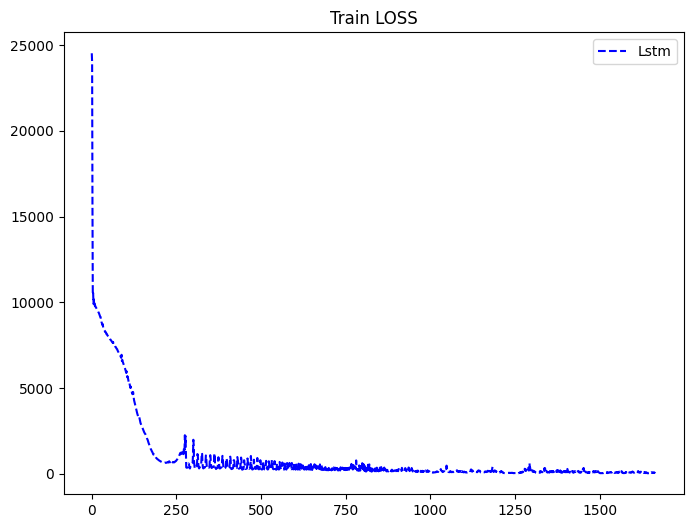

In [154]:
#训练损失表现
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
plt.title('Train LOSS')
#axes.plot(LossList1, 'g--')
#axes.plot(LossList2, 'r--')
#axes.plot(LossList3, 'y--')
axes.plot(LossList4, 'b--')
plt.legend(('Lstm', 'Cnn', 'Cnn-Lstm', 'Lstm-Cnn'),fontsize='10')
plt.savefig('drive/MyDrive/plot/训练损失结果ce.png', dpi=1200)
plt.show()

## 训练集表现结果

In [155]:
#train_predict_1 = pd.DataFrame(train_predict_1)
#train_predict_2 = pd.DataFrame(train_predict_2)
#train_predict_3 = pd.DataFrame(train_predict_3)
train_predict_4 = pd.DataFrame(train_predict_4)
y_train_plot = pd.DataFrame(y_train_plot)

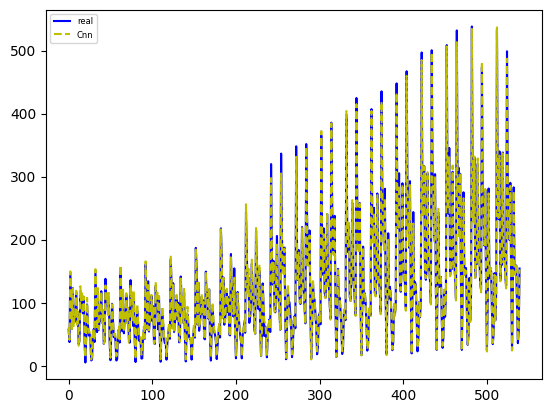

In [156]:
#训练集结果
#df = pd.DataFrame({'真实值':y_data_plot, 'SDM-Cnn':data_predict_1, 'SDM-Lstm':data_predict_2, 'SDM-Lstm-Cnn':data_predict_3})
#df = pd.concat([y_train_plot,train_predict_1,train_predict_2,train_predict_3,train_predict_4],axis = 1,ignore_index = True)
#df.to_excel('drive/MyDrive/炳哥合作/消融实验/train(weight).xlsx', sheet_name='sheet1', index=False)


plt.plot(y_train_plot,'-',color='b')
plt.plot(train_predict_4,'--',color='y')
plt.legend(('real', 'Cnn'),fontsize='6')
#plt.xlabel(xlabel='训练集预测结果', fontsize=16)
plt.savefig('drive/MyDrive/plot/消融实验(权训练集)ce.png', dpi=1200)
plt.show()

## 测试集表现结果

In [192]:
#test_predict_1 = pd.DataFrame(test_predict_1)
#test_predict_2 = pd.DataFrame(test_predict_2)
#test_predict_3 = pd.DataFrame(test_predict_3)
test_predict_4 = pd.DataFrame(test_predict_4)
y_test_plot = pd.DataFrame(y_test_plot)

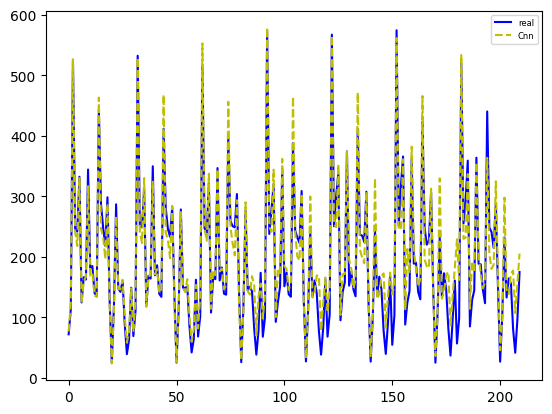

In [193]:
#测试集结果
#df_1 = pd.DataFrame({'真实值':y_data_plot, 'SDM-Cnn':data_predict_1, 'SDM-Lstm':data_predict_2, 'SDM-Lstm-Cnn':data_predict_3})
#df_1 = pd.concat([y_test_plot,test_predict_1,test_predict_2,test_predict_3,test_predict_4],axis = 1,ignore_index = True)
#df_1.to_excel('drive/MyDrive/炳哥合作/消融实验/test(weight).xlsx', sheet_name='sheet1', index=False)

plt.plot(y_test_plot,'-',color='b')
plt.plot(test_predict_4,'--',color='y')
plt.legend(('real', 'Cnn'),fontsize='6')
#plt.xlabel(xlabel='测试集预测结果', fontsize=16)
#plt.savefig('drive/MyDrive/plot/消融实验(权测试集)ce.pdf', dpi=1200)
plt.show()

## 训练集+测试集结果展示

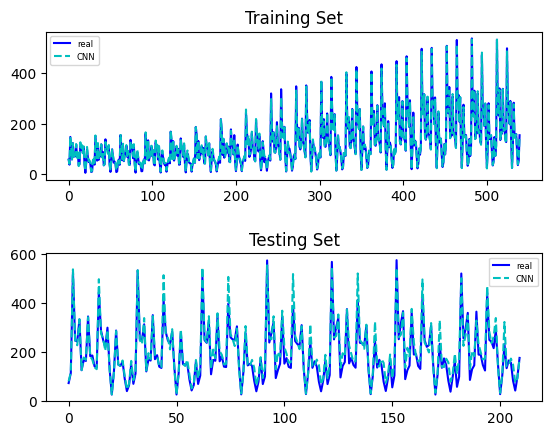

In [159]:
plt.subplot(2,1,1)
plt.plot(y_train_plot,'-',color='b')
plt.plot(train_predict_4,'--',color='c')
plt.legend(('real', 'CNN'),fontsize='6')
plt.title('Training Set')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.subplot(2,1,2)
plt.plot(y_test_plot,'-',color='b')
plt.plot(test_predict_4,'--',color='c')
plt.legend(('real', 'CNN'),fontsize='6')
plt.title('Testing Set')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.savefig('drive/MyDrive/plot/消融实验(权汇总)ce.pdf', dpi=1200)
plt.show()

预测

In [160]:
moudle4.eval()
predict_1 = moudle4(pre_x1)

predict_1 = predict_1.cpu().data.numpy()
predict_1 = pd.DataFrame(predict_1)
#predict_1 = predict_1.apply(np.exp)
#predict_1 = np.array(predict_1).tolist()

In [161]:
moudle4.eval()
predict_2 = moudle4(pre_x2)

predict_2 = predict_2.cpu().data.numpy()
predict_2 = pd.DataFrame(predict_2)
#predict_2 = predict_2.apply(np.exp)

In [162]:
moudle4.eval()
predict_3 = moudle4(pre_x3)

predict_3 = predict_3.cpu().data.numpy()
predict_3 = pd.DataFrame(predict_3)
#predict_3 = predict_3.apply(np.exp)

In [163]:
moudle4.eval()
predict_4 = moudle4(pre_x4)

predict_4 = predict_4.cpu().data.numpy()
predict_4 = pd.DataFrame(predict_4)
#predict_4 = predict_4.apply(np.exp)

In [164]:
moudle4.eval()
predict_5 = moudle4(pre_x5)

predict_5 = predict_5.cpu().data.numpy()
predict_5 = pd.DataFrame(predict_5)
#predict_5 = predict_5.apply(np.exp)

In [165]:
predict_1.to_excel(excel_writer='基准情景预测ce.xlsx', index=False)
predict_2.to_excel(excel_writer='产业结构优化情景预测ce.xlsx', index=False)
predict_3.to_excel(excel_writer='粗放情景预测ce.xlsx', index=False)
predict_4.to_excel(excel_writer='节能减排情景预测ce.xlsx', index=False)
predict_5.to_excel(excel_writer='协调发展情景预测ce.xlsx', index=False)